In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/content/Library_Services_20240831.csv')

In [ ]:
data_types = df.dtypes
print(data_types)

Branch          object
Webpage         object
Address         object
City            object
Zip              int64
                ...   
metrobus Z6     object
metrobus Z9     object
Latitude       float64
Longitude      float64
Location        object
Length: 105, dtype: object


In [ ]:
duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

Total duplicate rows: 0


In [ ]:
df.head()

,Branch,Webpage,Address,City,Zip,Square Feet,Inventory,Population Size,Phone,TTY Phone,...,metrobus Q1,metrobus Q2,metrobus T2,metrobus z2,metrobus Z8,metrobus Z6,metrobus Z9,Latitude,Longitude,Location
0,Aspen Hill,http://montgomerycountymd.gov/Library/branches...,4407 Aspen Hill Road,Rockville,20853,16100,78647,NaN,240-773-9410,301-871-2097,...,n,n,n,n,n,n,n,39.079524,-77.088752,4407 Aspen Hill Rd\nRockville 20853\n(39.07916...
1,Gaithersburg,http://montgomerycountymd.gov/Library/branches...,18330 Montgomery Village Avenue,Gaithersburg,20879,62525,153055,NaN,240-773-9490,NaN,...,n,n,n,n,n,n,n,39.158089,-77.205466,18330 Montgomery Village Ave\nGaithersburg 208...
2,Maggie Nightingale,http://montgomerycountymd.gov/Library/branches...,19633 Fisher Avenue,Poolseville,20837,6250,38456,NaN,240-773-9550,301-972-7825,...,n,n,n,n,n,n,n,39.145139,-77.410286,19633 Fisher Avenue\nPoolseville 20837\n(39.14...
3,Potomac,http://montgomerycountymd.gov/Library/branches...,10101 Glenolden Drive,Potomac,20854,16000,92628,NaN,240-777-0690,301-765-4083,...,n,n,y,n,n,n,n,39.019274,-77.207797,10101 Glenolden Drive\nPotomac 20854\n(39.0188...
4,White Oak,http://montgomerycountymd.gov/Library/branches...,11701 New Hampshire Avenue,Silver Spring,20904,16205,94217,NaN,240-773-9555,NaN,...,n,n,n,y,y,n,n,39.048025,-76.992139,"11701 New Hampshire Avenue\n(39.047701, -76.99..."


In [ ]:
df.isnull().sum()

,0
Branch,0
Webpage,0
Address,0
City,0
Zip,0
...,...
metrobus Z6,0
metrobus Z9,0
Latitude,0
Longitude,0


In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

In [ ]:
!pip install scipy

In [ ]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f'Number of outliers: {df_outliers.shape[0]}')

Number of outliers: 0


In [ ]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

In [ ]:
!pip install matplotlib seaborn

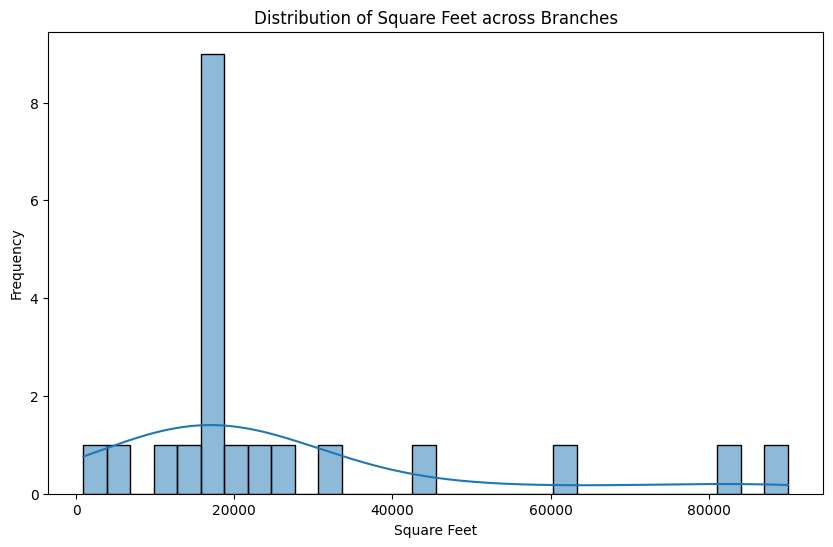

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
sns.histplot(df['Square Feet'], bins=30, kde=True)
plt.title('Distribution of Square Feet across Branches')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px

fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='Branch',
                     hover_data=['City', 'Inventory', 'Population Size'],
                     title='Library Branch Locations',
                     projection="natural earth")
fig.show()

In [ ]:
#How does the library inventory size vary across different cities?
fig = px.bar(df, x='City', y='Inventory',
             title="Library Inventory per City",
             labels={'Inventory': 'Total Inventory', 'City': 'City'},
             hover_data=['Branch', 'Population Size'])

fig.update_traces(marker_color='royalblue')
fig.update_layout(xaxis_title="City", yaxis_title="Inventory Size", showlegend=False)

fig.show()

In [ ]:
#How does the population size in each city compare with the inventory size?
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Population Size', x=df['City'], y=df['Population Size']),
    go.Bar(name='Inventory', x=df['City'], y=df['Inventory'])
])

# Change the bar mode to group
fig.update_layout(barmode='group', title='Population Size vs Inventory by City',
                  xaxis_title='City', yaxis_title='Count')

fig.show()

In [ ]:
#Which libraries have access to Metro Stations and Bus Stops?
import pandas as pd
import plotly.express as px

# Sample DataFrame for illustration
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'Metro Station': [1, 0, 1, 0],
    'Bus 4': [1, 1, 0, 1],
    'Bus 5': [0, 1, 1, 1],
    'Bus 6': [0, 0, 1, 1],
    'Bus 7': [1, 0, 0, 1],
    'Bus 9': [1, 1, 1, 0],
    'Bus 12': [0, 1, 1, 0]
})

# List of transport options
transport = ['Metro Station', 'Bus 4', 'Bus 5', 'Bus 6', 'Bus 7', 'Bus 9', 'Bus 12']

# Calculate the count of branches for each transport option
metro_bus_counts = df[transport].sum()

# Create the bar chart
fig = px.bar(x=metro_bus_counts.index, y=metro_bus_counts.values,
             title="Availability of Metro and Bus Services to Libraries",
             labels={'x': 'Transport Options', 'y': 'Count of Branches'})

# Update the color of the bars
fig.update_traces(marker_color='seagreen')

# Show the plot
fig.show()

In [ ]:
# Count of libraries served by each bus route
bus_columns = [col for col in df.columns if 'Bus' in col]
bus_counts = df[bus_columns].sum()
fig = px.bar(x=bus_counts.index, y=bus_counts.values, title='Libraries Served by Each Bus Route', labels={'x': 'Bus Route', 'y': 'Number of Libraries'})
fig.show()

In [ ]:
# Count the number of libraries served by each bus route and metrobus route
transit_counts = df[[col for col in df.columns if 'Bus' in col or 'metrobus' in col.lower()]].apply(lambda x: (x > 0).sum(), axis=0)

# Plot pie chart for the distribution of libraries with various transit routes
fig = px.pie(values=transit_counts.values, names=transit_counts.index, title='Distribution of Libraries with Various Transit Routes')
fig.show()

**About Dataset**

This dataset contains information about each library, such as the branch name, address, city, ZIP code, square footage, inventory size, contact details, accessibility features, and available public transportation options. Additionally, the it contains geographical data like latitude and longitude, which can be used for spatial analysis or mapping purposes. I believe there is several analyses can be performed to derive meaningful insights such as:

**Geospatial Analysis:** To visualize the geographic distribution of library branches and assess their accessibility in relation to population density and public transportation options.

**Descriptive Statistics:** To summarize the central tendencies, variability, and overall distribution of key variables such as inventory size, square footage, and population size.

**Correlation Analysis:** To identify relationships between different variables, such as the relationship between inventory size and square footage or between population size and the number of available library services.

**Resource Utilization Analysis:** To evaluate how efficiently each library branch utilizes its space and inventory in serving the local community.